<a href="https://colab.research.google.com/github/Shaikhhasan03/Digit-Recognition-using-RandomForest/blob/main/BREASTCANCERDETECTIONUSINGXGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv("dataset.csv")

In [26]:
data.head(30)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [6]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split #splitting dataset into train & Test

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [19]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0,test_size=0.2)

LR: 0.653838 (0.005145)
LDA: 0.965219 (0.027599)
KNN: 0.613367 (0.053558)
CART: 0.937811 (0.029705)
NB: 0.759495 (0.069983)
SVM: 0.661145 (0.012622)


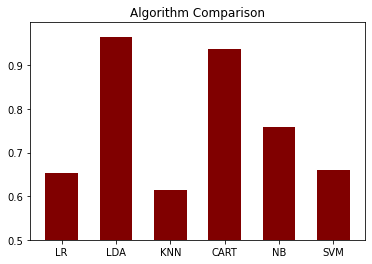

In [23]:
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

plt.ylim(.500, .999)
plt.bar(names, res, color ='maroon', width = 0.6)

plt.title('Algorithm Comparison')
plt.show()

In [24]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,Y_train)

XGBClassifier()

In [25]:
from sklearn.metrics import accuracy_score
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test,Y_pred)*100)

97.8102189781022


In [14]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=model,X=X_train,y=Y_train,cv=10)
print("Acuuarcy:{0}%".format(accuracies.mean()*100))

Acuuarcy:96.52525252525253%
